**Application Ranking**

**Plan of Attack:**


--> Load the dataset using pandas, then preprocess the data which may include handling missing data, conversion of the categorial variables, and  Splitting the data into train and test 


---> Evaluation of model performance based on metrics like accuracy, precision, recall, F1-score




In [ ]:
#importing libraries 

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.python import keras
import seaborn as sns

**Load Nursery dataset** <https://archive-beta.ics.uci.edu/dataset/76/nursery>

In [ ]:
#loading nursery dataset using pandas

df = pd.read_csv('nursery.data',na_values='?',header=None)
df.columns=["parents","has_nurs","form","children","housing","finance","social","health","class"]

In [ ]:
#printing the dataset 

df.head(10)

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


Observations : 
Except "children" attribute all are categorial values so we have to use encoding techniques

In [ ]:
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [ ]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, count to freq
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   4 non-null      object
 1   has_nurs  4 non-null      object
 2   form      4 non-null      object
 3   children  4 non-null      object
 4   housing   4 non-null      object
 5   finance   4 non-null      object
 6   social    4 non-null      object
 7   health    4 non-null      object
 8   class     4 non-null      object
dtypes: object(9)
memory usage: 320.0+ bytes


Observation : No null values in the dataset so no need of handling of null values

**Data Preprocessing**

**Visualizing all the 8 features  using matplotlib** 

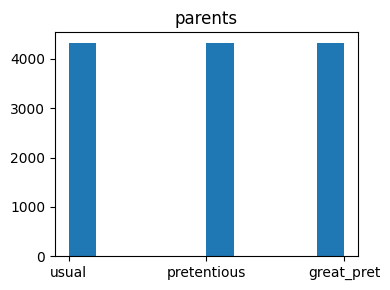

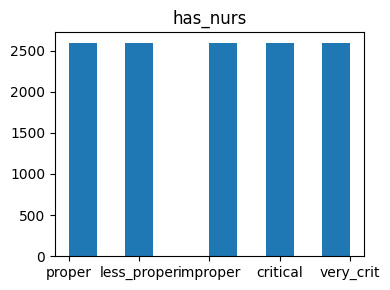

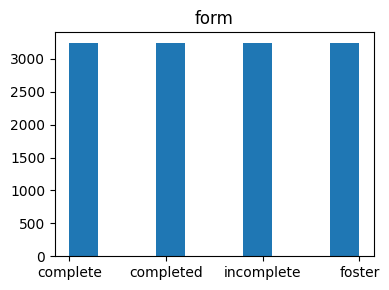

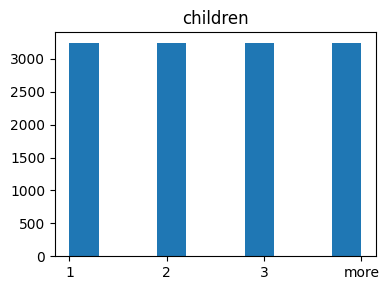

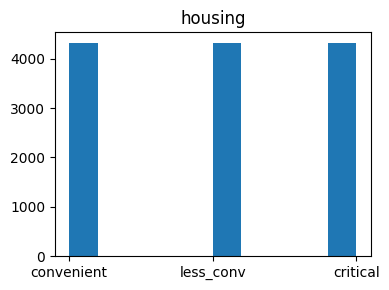

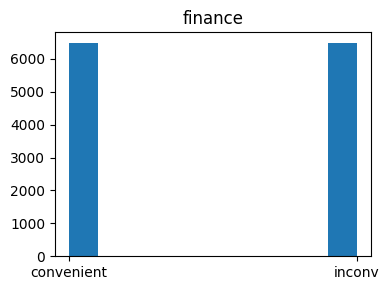

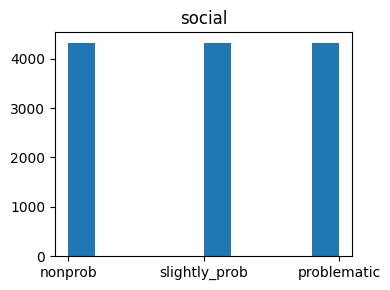

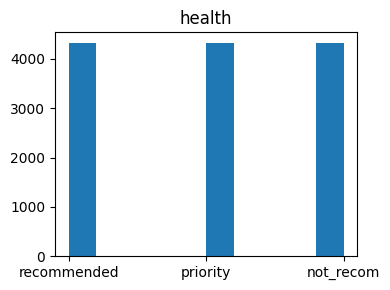

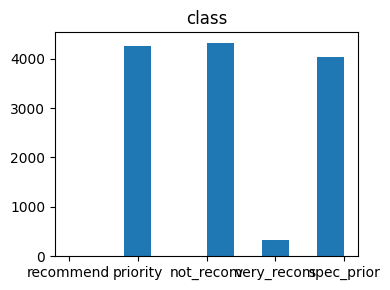

In [ ]:
for i in df.columns:
  plt.figure(figsize=(4, 3))
  plt.hist(df[i])
  plt.title(i)
  plt.tight_layout()
  plt.show

In [ ]:
print(df['class'].value_counts())

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: class, dtype: int64


**Handling Null values**

In [ ]:
#checking for missing values

print(df.isnull().any())

parents     False
has_nurs    False
form        False
children    False
housing     False
finance     False
social      False
health      False
class       False
dtype: bool


As we can observe there are no null values So we can proceed with the next step of pre-processing i.e; Encoding

Except children attribute rest all the values of the attributes are in string format,So we need to convert the strings to numbers or binary codes  inorder to feed the model.


**Encoding**

Initially we divide the dataset df into df1 and df2 based on feature priorities 

All the features in df1 are encoded by using get_dummies method in pandas where as rest of the features in df2 are encoded using categorical encoding 

After encoding both the dataframes are concated using concat method in pandas

In [ ]:
f1 = ['parents','form','health']
f2=["has_nurs","children","housing","finance","social","class"]

df1=df.drop(f2,axis=1)
df2=df.drop(f1,axis=1)



In [ ]:
df1=pd.get_dummies(df1)
df1.head(5)

,parents_great_pret,parents_pretentious,parents_usual,form_complete,form_completed,form_foster,form_incomplete,health_not_recom,health_priority,health_recommended
0,0,0,1,1,0,0,0,0,0,1
1,0,0,1,1,0,0,0,0,1,0
2,0,0,1,1,0,0,0,1,0,0
3,0,0,1,1,0,0,0,0,0,1
4,0,0,1,1,0,0,0,0,1,0


In [ ]:
for i in f2:
  df2[i]=df2[i].astype("category").cat.codes

df2.head(5)


,has_nurs,children,housing,finance,social,class
0,3,0,0,0,0,2
1,3,0,0,0,0,1
2,3,0,0,0,0,0
3,3,0,0,0,2,2
4,3,0,0,0,2,1


In [ ]:
df_enc=pd.concat([df1,df2],axis=1)
df_enc.head(5)

,parents_great_pret,parents_pretentious,parents_usual,form_complete,form_completed,form_foster,form_incomplete,health_not_recom,health_priority,health_recommended,has_nurs,children,housing,finance,social,class
0,0,0,1,1,0,0,0,0,0,1,3,0,0,0,0,2
1,0,0,1,1,0,0,0,0,1,0,3,0,0,0,0,1
2,0,0,1,1,0,0,0,1,0,0,3,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,1,3,0,0,0,2,2
4,0,0,1,1,0,0,0,0,1,0,3,0,0,0,2,1


**Splitting data into Feature matrix and Target vector**

In [ ]:
#Feature matrix
X=df_enc.drop("class",axis=1)
X.shape

(12960, 15)

In [ ]:
#Target vector
y=pd.DataFrame(df_enc["class"])
y.shape

(12960, 1)

**Dimensionality Reduction**

We have 15 dimensions in the data,so we use Principal Component Analysis for dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=8)
X_str = pca.fit_transform(X)
X_str.shape

(12960, 8)

**Splitting into train and test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_str,y, test_size=0.2)

**Scaling the data using Min_Max Scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Implementing Naive Baye's model**

In [ ]:
from sklearn.naive_bayes import CategoricalNB,BernoulliNB,MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
nb=CategoricalNB()
nb.fit(X_train,y_train.values.ravel())
y_pred=nb.predict(X_test)
print(classification_report(y_test, y_pred,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50       855
           1       1.00      0.00      0.00       838

   micro avg       0.33      0.51      0.40      1693
   macro avg       0.66      0.50      0.25      1693
weighted avg       0.66      0.51      0.25      1693



In [ ]:
nb=BernoulliNB()
nb.fit(X_train,y_train.values.ravel())
y_pred=nb.predict(X_test)
print(classification_report(y_test, y_pred,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50       855
           1       0.00      0.00      0.00       838
           3       0.00      0.00      0.00       828

   micro avg       0.33      0.34      0.33      2521
   macro avg       0.11      0.33      0.17      2521
weighted avg       0.11      0.34      0.17      2521



In [ ]:
nb=MultinomialNB()
nb.fit(X_train,y_train.values.ravel())
y_pred=nb.predict(X_test)
print(classification_report(y_test, y_pred,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       855
           1       0.58      0.80      0.67       838
           3       0.72      0.51      0.60       828

   micro avg       0.75      0.77      0.76      2521
   macro avg       0.77      0.77      0.76      2521
weighted avg       0.77      0.77      0.76      2521



MultinomialNB is giving highest accuracy when compared to Categorical and Bernouli so we are considering the MultinomialNB model 

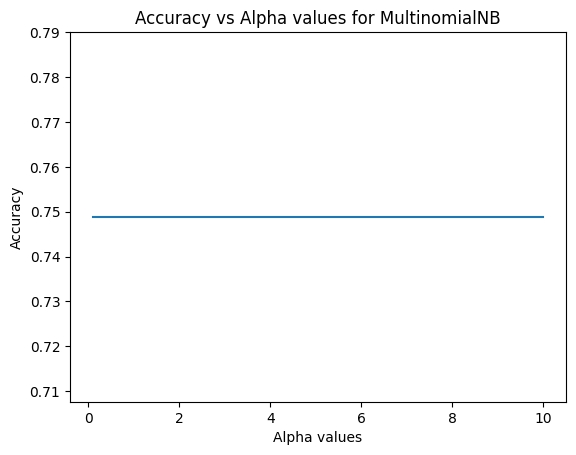

In [ ]:
alphas = np.arange(0.1, 10.1, 0.1)
accuracies = []
for alpha in alphas:
    nb = MultinomialNB(alpha=alpha)
    nb.fit(X_train, y_train.values.ravel())
    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(alphas, accuracies)
plt.xlabel('Alpha values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha values for MultinomialNB')
plt.show()

While hyperparameter tuning we can observe that for any given alpha (0.1 -10) value the highest accuracy is 75% on the testing data 

***Implementing K-Nearest Neighbours Classification algorithm ***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
k_range = range(3, 11)
train_accuracy = []
test_accuracy = []

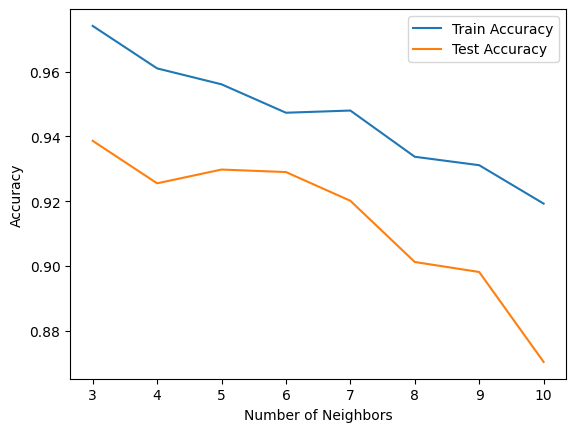

In [ ]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(k_range, train_accuracy, label='Train Accuracy')
plt.plot(k_range, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


We can observe above that we get maximum testing accuracy from k=6. So lets create a KNeighborsClassifier with number of neighbors as 6.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)  
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       855
           1       0.86      0.94      0.90       838
           3       0.95      0.88      0.91       828
           4       0.78      0.56      0.65        70

   micro avg       0.93      0.93      0.93      2591
   macro avg       0.90      0.84      0.86      2591
weighted avg       0.93      0.93      0.93      2591



**Implementing Neuarl Network using Tensorflow**

In [ ]:
from tensorflow.python import keras

In [ ]:
model = tf.keras.Sequential([
    keras.layers.Dense(25, input_shape=(X_str[0].shape), activation=tf.nn.tanh),
    keras.layers.Dense(13, activation=tf.nn.tanh),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
             metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=2)

Epoch 1/50
260/260 - 1s - loss: 0.1114 - accuracy: 0.9400 - val_loss: 0.1290 - val_accuracy: 0.9364 - 695ms/epoch - 3ms/step
Epoch 2/50
260/260 - 1s - loss: 0.1122 - accuracy: 0.9414 - val_loss: 0.1279 - val_accuracy: 0.9397 - 579ms/epoch - 2ms/step
Epoch 3/50
260/260 - 1s - loss: 0.1112 - accuracy: 0.9408 - val_loss: 0.1278 - val_accuracy: 0.9392 - 615ms/epoch - 2ms/step
Epoch 4/50
260/260 - 1s - loss: 0.1110 - accuracy: 0.9408 - val_loss: 0.1264 - val_accuracy: 0.9373 - 627ms/epoch - 2ms/step
Epoch 5/50
260/260 - 1s - loss: 0.1112 - accuracy: 0.9422 - val_loss: 0.1271 - val_accuracy: 0.9397 - 583ms/epoch - 2ms/step
Epoch 6/50
260/260 - 1s - loss: 0.1121 - accuracy: 0.9414 - val_loss: 0.1271 - val_accuracy: 0.9373 - 577ms/epoch - 2ms/step
Epoch 7/50
260/260 - 1s - loss: 0.1113 - accuracy: 0.9400 - val_loss: 0.1337 - val_accuracy: 0.9272 - 601ms/epoch - 2ms/step
Epoch 8/50
260/260 - 1s - loss: 0.1120 - accuracy: 0.9386 - val_loss: 0.1287 - val_accuracy: 0.9378 - 748ms/epoch - 3ms/step


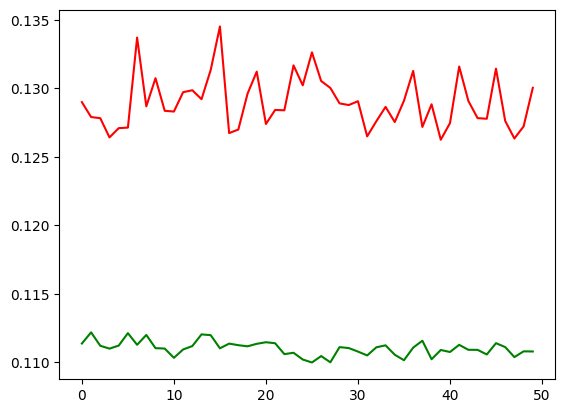

In [ ]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'],'r')

In [ ]:
loss,accuracy = model.evaluate(X_test,y_test)
print(accuracy*100)

81/81 [==============================] - 0s 3ms/step - loss: 0.1232 - accuracy: 0.9425
94.25154328346252


Conclusion :

For the given data 

Accuracy for Naive bayes model is 75% 
Accuracy for KNN Classifier is 93%
Accuracy for Neural network is 94% upon hyperparameter tunning we can acheive more accuracy for neural network

We can consider Neural network as the best model since KNN is a stastical model.